<a href="https://colab.research.google.com/github/CarmenRaposo/06MAIR-Aprendizaje-No-Supervisado-Trabajo-Final/blob/master/Trabajo%20Final/Trabajo_Final_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte inicial genérica:

In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

(150, 4)


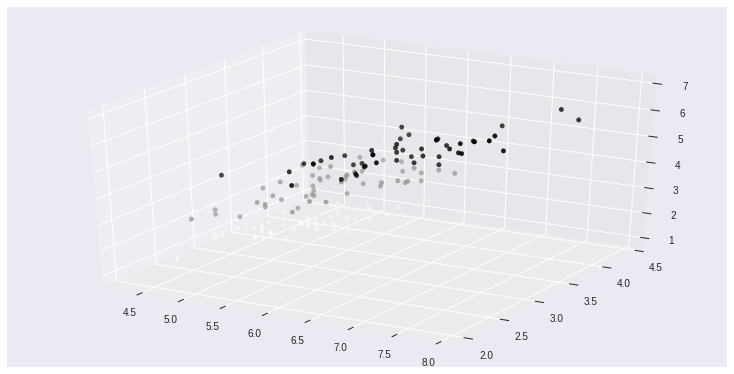

In [7]:
iris = datasets.load_iris()
Dx = iris.data[:, :3]  # we only take the first three features.
Dy = iris.target
print(iris.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)

# Algoritmos Jerárquicos
## Algoritmo Jerárquico aglomerativo

Usamos las funciones disponibles en las distintas librerias de Python

In [0]:
#Importamos librerias necesarias para los algoritmos aglomerativos
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree
# Importamos la libreria para el método dendrogram de scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


#Con el paámetro linkage podemos controlar los criterios usados. 
#Probaremos 3 criterios: disimilitud mínima : 'single'; máxima: 'complete'; y media: 'average'

#Dx viene definido al inicio del notebook y es comun para los 3 bloques.

modelo_single = AgglomerativeClustering(linkage="single")
modelo_single = modelo_single.fit(Dx)

modelo_complete = AgglomerativeClustering(linkage="complete")
modelo_complete = modelo_complete.fit(Dx)

modelo_average = AgglomerativeClustering(linkage="average")
modelo_average = modelo_average.fit(Dx)



Dendrograma según criterio de disimilitud: mínima, máxima, media


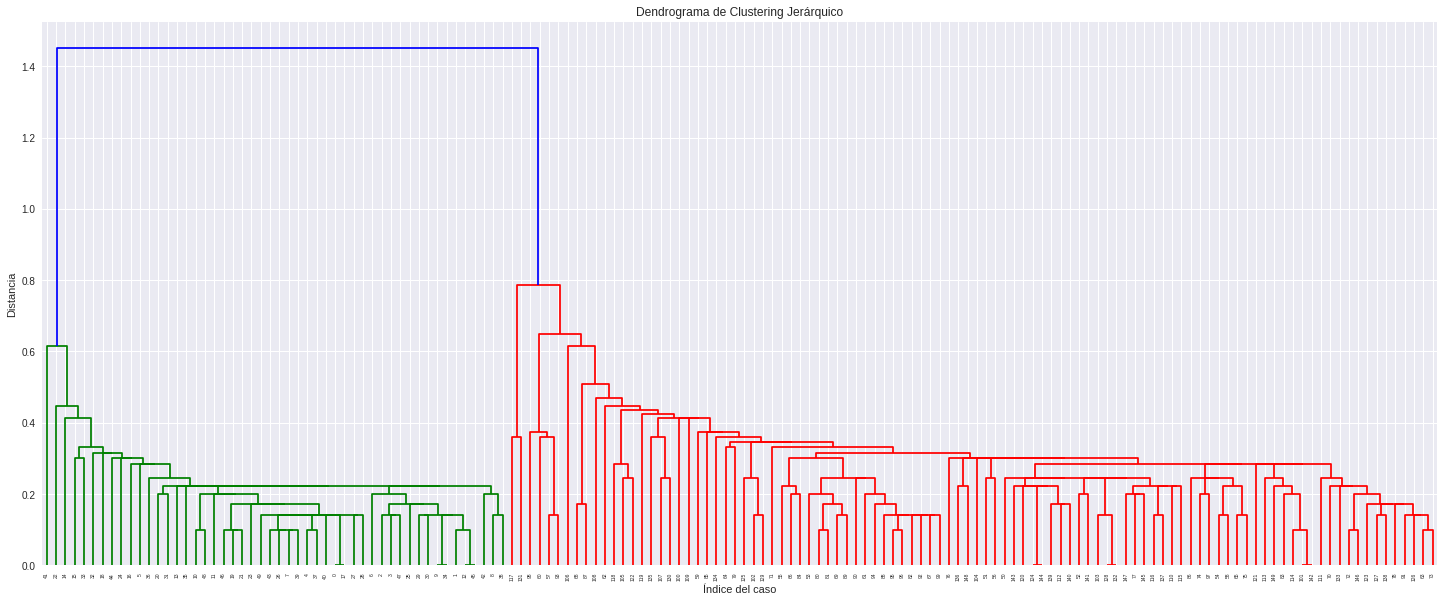

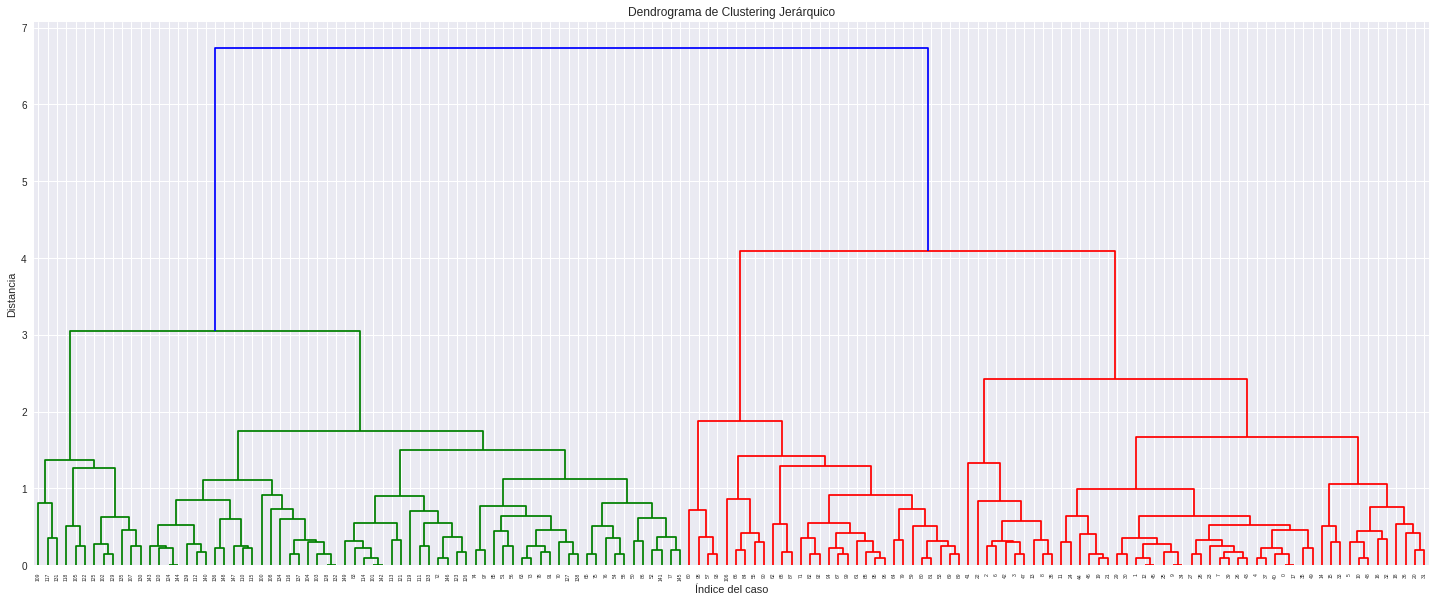

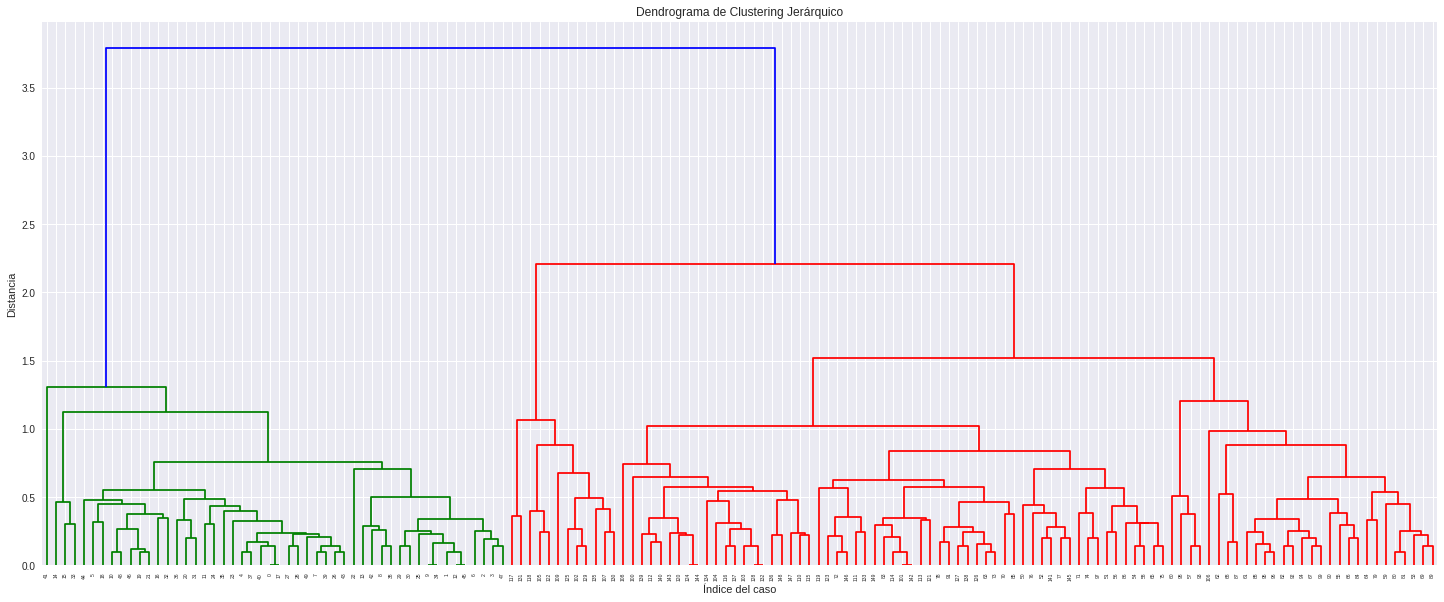

In [47]:
def matriz_enlaces(modelo):
  # Creamos la matriz de enlaces que necesita el método dendrogram de scipy
  uniones = modelo.children_
  # Las distancias y los tamaños, en esta ocasión, los asignamos de manera 
  # inocua para no alterar el resultado (no disponemos de la información completa)
  distancias = np.arange(uniones.shape[0])
  tamanyos = np.arange(2, uniones.shape[0]+2)
  mEnlaces = np.column_stack([uniones, distancias, tamanyos]).astype(float)

  return dendrogram(mEnlaces)

#función imprimir dendrograma
def plot_den(modelo):
  plt.figure(figsize=(25, 10))
  plt.title('Dendrograma de Clustering Jerárquico')
  plt.xlabel('Índice del caso')
  plt.ylabel('Distancia')
  dendrogram(modelo)
  plt.show() 
  
  
# Creamos la matriz de enlaces para cada criterio
#matriz_enlaces(modelo_single)
#matriz_enlaces(modelo_complete)
#matriz_enlaces(modelo_average)


modelo_single = linkage(Dx, 'single')   # disimilitud mínima
modelo_complete = linkage(Dx, 'complete') # disimilitud máxima
modelo_average = linkage(Dx, 'average')  # disimilitud media

#Representamos el dendrograma según cada criterio de disimilitud
print("Dendrograma según criterio de disimilitud: mínima, máxima, media")
plot_den(modelo_single)
plot_den(modelo_complete)
plot_den(modelo_average)

#clusters = fcluster(mEnlaces, 3, criterion='maxclust')
#print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


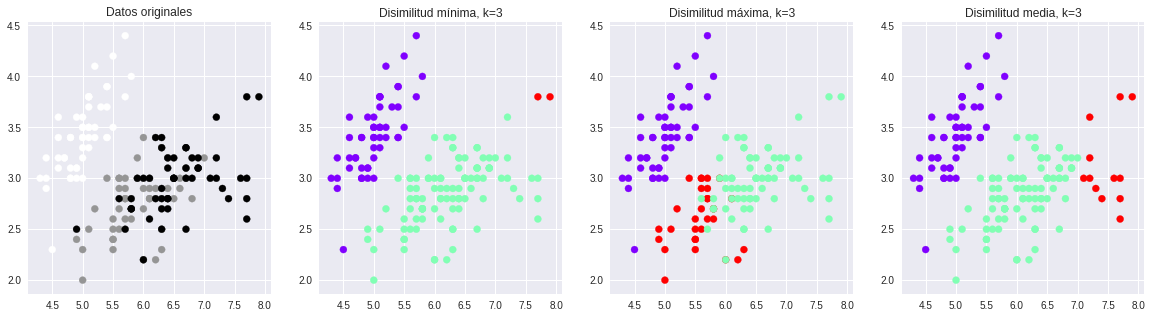

<Figure size 1800x720 with 0 Axes>

In [54]:
def calcular_clusters(modelo, K):
  return cut_tree(modelo, n_clusters = K).flatten()

def plot_modelo_cluster(K):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos originales')
    plt.figure(figsize=(25, 10))
    
    clust=calcular_clusters(modelo_single, K)
    ax[1].scatter(Dx[:,0], Dx[:,1], c=clust, cmap='rainbow')
    print(cut_tree(modelo, n_clusters = K).flatten())
    ax[1].set_title('Disimilitud mínima, k=%s'%K)
    
    
    
    clust=calcular_clusters(modelo_complete, K)
    ax[2].scatter(Dx[:,0], Dx[:,1], c=clust, cmap='rainbow')
    ax[2].set_title('Disimilitud máxima, k=%s'%K)
    
    clust=calcular_clusters(modelo_average, K)
    ax[3].scatter(Dx[:,0], Dx[:,1], c=clust, cmap='rainbow')
    ax[3].set_title('Disimilitud media, k=%s'%K)

plot_modelo_cluster(3)

In [25]:
from sklearn.metrics import mutual_info_score, silhouette_score,  calinski_harabaz_score

print(silhouette_score(Dx,Dy))
print(calinski_harabaz_score(Dx, Dy))

0.4789155593488922
452.32906346823677
